<a href="https://colab.research.google.com/github/aperezb97/FAO/blob/main/FAO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importamos las librerias**

---






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import os

## **Importamos el dataset**

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coderhouse/Trabajo final/FAOSTAT_data_es_8-9-2022.csv')
fao

,Código Ámbito,Ámbito,Código área (FAO),Área,Código Elemento,Elemento,Código Producto (FAO),Producto,Código año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1961,1961,toneladas,177,NaN,Datos oficiales
1,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1962,1962,toneladas,15,NaN,Datos oficiales
2,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1963,1963,toneladas,199,NaN,Datos oficiales
3,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1964,1964,toneladas,757,NaN,Datos oficiales
4,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1965,1965,toneladas,186,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2016,2016,1000 US$,5387270,NaN,Datos oficiales
4784,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2017,2017,1000 US$,6093290,NaN,Datos oficiales
4785,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2018,2018,1000 US$,5458267,NaN,Datos oficiales
4786,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2019,2019,1000 US$,6265916,NaN,Datos oficiales


**Agrupamos por commodities, país, coóigo y área para determinar los valores de cada uno y registrarlos.**

---


In [ ]:
producto = fao.groupby('Producto')
trigo = producto.get_group('Trigo')
trigo

,Código Ámbito,Ámbito,Código área (FAO),Área,Código Elemento,Elemento,Código Producto (FAO),Producto,Código año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
948,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,15,Trigo,1961,1961,toneladas,0,NaN,Datos oficiales
949,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,15,Trigo,1962,1962,toneladas,0,NaN,Datos oficiales
950,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,15,Trigo,1963,1963,toneladas,0,NaN,Datos oficiales
951,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,15,Trigo,1964,1964,toneladas,0,NaN,Datos oficiales
952,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,15,Trigo,1965,1965,toneladas,0,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4783,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2016,2016,1000 US$,5387270,NaN,Datos oficiales
4784,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2017,2017,1000 US$,6093290,NaN,Datos oficiales
4785,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2018,2018,1000 US$,5458267,NaN,Datos oficiales
4786,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5922,Exportaciones Valor,15,Trigo,2019,2019,1000 US$,6265916,NaN,Datos oficiales


**Usamos counts para comprobar los productos en el dataset.**

---



In [ ]:
fao['Producto'].value_counts()

Aceite, soja     960
Maiz             960
Soja             960
Trigo            960
Aceite, palma    948
Name: Producto, dtype: int64

In [ ]:
producto['Código área (FAO)'].value_counts()

Producto       Código área (FAO)
Aceite, palma  21                   240
               231                  240
               351                  240
               9                    228
Aceite, soja   9                    240
               21                   240
               231                  240
               351                  240
Maiz           9                    240
               21                   240
               231                  240
               351                  240
Soja           9                    240
               21                   240
               231                  240
               351                  240
Trigo          9                    240
               21                   240
               231                  240
               351                  240
Name: Código área (FAO), dtype: int64

In [ ]:
fao['Unidad'].value_counts()

toneladas    2394
1000 US$     2394
Name: Unidad, dtype: int64

## **VALORES NaN**

---



In [ ]:
# Suma de valores nulos
fao.isnull().sum()

Código Ámbito                 0
Ámbito                        0
Código área (FAO)             0
Área                          0
Código Elemento               0
Elemento                      0
Código Producto (FAO)         0
Producto                      0
Código año                    0
Año                           0
Unidad                        0
Valor                         0
Símbolo                    3504
Descripción del Símbolo       0
dtype: int64

In [ ]:
#Conteo de valores para luego no tener en cuenta columna de símbolo, ya que no es relevante
fao.value_counts()

Código Ámbito  Ámbito                             Código área (FAO)  Área       Código Elemento  Elemento                  Código Producto (FAO)  Producto       Código año  Año   Unidad     Valor   Símbolo  Descripción del Símbolo                                                        
TCL            Cultivos y productos de ganadería  9                  Argentina  5610             Importaciones - Cantidad  15                     Trigo          2012        2012  toneladas  18      *        Cifras no oficiales                                                                1
                                                  351                China      5910             Exportaciones - Canditad  56                     Maiz           2020        2020  toneladas  2675    A        Agregado, puede incluir datos oficiales, semi-oficiales, estimados o calculados    1
                                                                                                                           236   

A traves lo anterior es posible darse cuenta que es necesario un encodign para transformar los datos text en números.

## **VISUALIZACIONES EN PYTHON**

---



---

In [ ]:
pais_producto = fao.groupby(['Área', 'Producto', 'Elemento']).sum('Valor')
pais_producto

Código área (FAO)  \
Área                      Producto      Elemento                                      
Argentina                 Aceite, palma Exportaciones - Canditad                486   
                                        Exportaciones Valor                     486   
                                        Importaciones - Cantidad                540   
                                        Importaciones Valor                     540   
                          Aceite, soja  Exportaciones - Canditad                540   
...                                                                             ...   
Estados Unidos de América Soja          Importaciones Valor                   13860   
                          Trigo         Exportaciones - Canditad              13860   
                                        Exportaciones Valor                   13860   
                                        Importaciones - Cantidad              13860   
                                        Importaciones Valor                   13860   

                                                                  Código Elemento  \
Área                      Producto      Elemento                                    
Argentina                 Aceite, palma Exportaciones - Canditad           319140   
                                        Exportaciones Valor                319788   
                                        Importaciones - Cantidad           336600   
                                        Importaciones Valor                337320   
                          Aceite, soja  Exportaciones - Canditad           354600   
...                                                                           ...   
Estados Unidos de América Soja          Importaciones Valor                337320   
                          Trigo         Exportaciones - Canditad           354600   
                                        Exportaciones Valor                355320   
                                        Importaciones - Cantidad           336600   
                                        Importaciones Valor                337320   

                                                                  Código Producto (FAO)  \
Área                      Producto      Elemento                                          
Argentina                 Aceite, palma Exportaciones - Canditad                  13878   
                                        Exportaciones Valor                       13878   
                                        Importaciones - Cantidad                  15420   
                                        Importaciones Valor                       15420   
                          Aceite, soja  Exportaciones - Canditad                  14220   
...                                                                                 ...   
Estados Unidos de América Soja          Importaciones Valor                       14160   
                          Trigo         Exportaciones - Canditad                    900   
                                        Exportaciones Valor                         900   
                                        Importaciones - Cantidad                    900   
                                        Importaciones Valor                         900   

                                                                  Código año  \
Área                      Producto      Elemento                               
Argentina                 Aceite, palma Exportaciones - Canditad      107330   
                                        Exportaciones Valor           107330   
                                        Importaciones - Cantidad      119430   
                                        Importaciones Valor           119430   
                          Aceite, soja  Exportaciones - Canditad      119430   
...                                                                      ...   
Esta

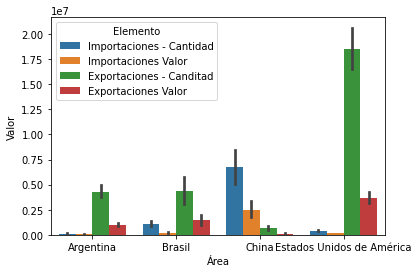

In [ ]:
sns.barplot(x='Área', y='Valor', data=fao, hue='Elemento')

En este gráfico es posible visualiar como cada país importa y exporta en cantidad, y que valor representa esa cantidad de exportaciones en dinero. Por ejemplo podemos visualizar como en Argentina las exportaciones en cantidades son de gran importancia, pero el valor de esas exportaciones es muy bajo debido a restricciones del país. No solo por restricciones del pais, sino que los commodities analizados tienen la caracteristica de manejo de gran volumen, si esta base de datos se encontrara China con exportaciones en tecnologia seria posible visualizar como las exportaciones en cantidad son menores en comparación al valor de lo exportado.
Mas adelante sera posible visualizar e interpretar como las importaciones de China que son mayores que las exportaciones, tienen una relación con los productos exportados de los demaás países.

In [ ]:
fao.columns

Index(['Código Ámbito', 'Ámbito', 'Código área (FAO)', 'Área',
       'Código Elemento', 'Elemento', 'Código Producto (FAO)', 'Producto',
       'Código año', 'Año', 'Unidad', 'Valor', 'Símbolo',
       'Descripción del Símbolo'],
      dtype='object')

In [ ]:
#Cambiando nombre de columnas en dataframe para trabajar de manera mas cómoda.
fao.columns = ['codigo', 'ambito', 'codigo_fao', 'area',
       'codigo_elemento', 'elemento', 'codigo_producto_fao', 'producto',
       'codigo_año', 'año', 'unidad', 'valor', 'simbolo',
       'descrip_simbolo']
fao.columns

Index(['codigo', 'ambito', 'codigo_fao', 'area', 'codigo_elemento', 'elemento',
       'codigo_producto_fao', 'producto', 'codigo_año', 'año', 'unidad',
       'valor', 'simbolo', 'descrip_simbolo'],
      dtype='object')

In [ ]:
fao['area'].value_counts()

Brasil                       1200
China                        1200
Estados Unidos de América    1200
Argentina                    1188
Name: area, dtype: int64

In [ ]:
#Filtramos por país
argentina = fao[fao['area']=='Argentina']
china = fao[fao['area']=='China']
brasil = fao[fao['area']=='Brasil']
eeuu = fao[fao['area']=='Estados Unidos de América']
argentina

,codigo,ambito,codigo_fao,area,codigo_elemento,elemento,codigo_producto_fao,producto,codigo_año,año,unidad,valor,simbolo,descrip_simbolo
0,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1961,1961,toneladas,177,NaN,Datos oficiales
1,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1962,1962,toneladas,15,NaN,Datos oficiales
2,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1963,1963,toneladas,199,NaN,Datos oficiales
3,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1964,1964,toneladas,757,NaN,Datos oficiales
4,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1965,1965,toneladas,186,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,15,Trigo,2016,2016,1000 US$,1867745,NaN,Datos oficiales
1184,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,15,Trigo,2017,2017,1000 US$,2361855,NaN,Datos oficiales
1185,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,15,Trigo,2018,2018,1000 US$,2419213,NaN,Datos oficiales
1186,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,15,Trigo,2019,2019,1000 US$,2295535,NaN,Datos oficiales


En los gráficos a continuación es posible visualizar segun cada elemento la cantidad, agrupado por país. De esta manera ya es posible obtener una visión detallada de la situación de cada país.

Text(0.5, 1.0, 'Argentina')

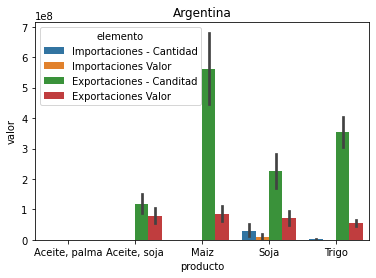

In [ ]:
par = sns.barplot(x='producto', y='valor', data=argentina, hue='elemento', estimator=sum)
par.set_title("Argentina")

Text(0.5, 1.0, 'Brasil')

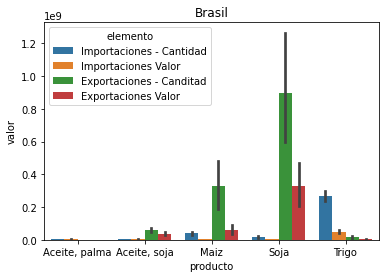

In [ ]:
pbr = sns.barplot(x='producto', y='valor', data=brasil, hue='elemento', estimator=sum)
pbr.set_title("Brasil")

Text(0.5, 1.0, 'China')

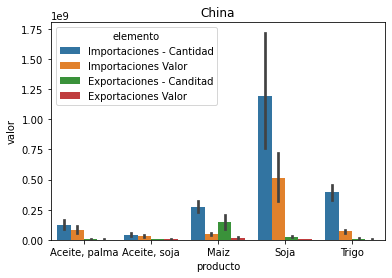

In [ ]:
pch = sns.barplot(x='producto', y='valor', data=china, hue='elemento', estimator=sum)
pch.set_title("China")

Text(0.5, 1.0, 'Estados Unidos')

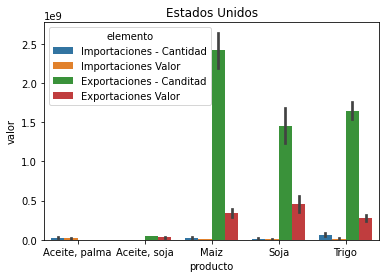

In [ ]:
peeuu = sns.barplot(x='producto', y='valor', data=eeuu, hue='elemento', estimator=sum)
peeuu.set_title("Estados Unidos")

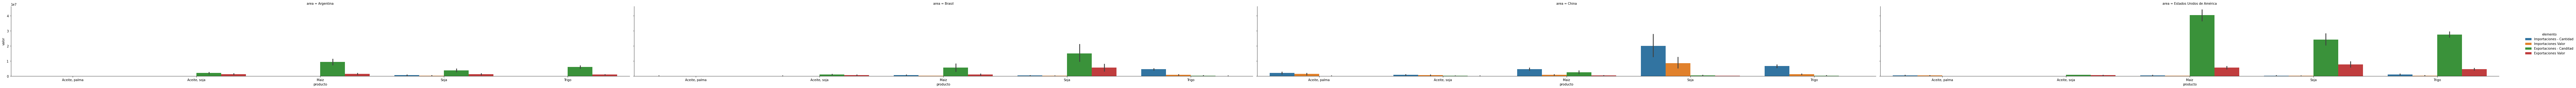

In [ ]:
#Gráfico por pais pero no es posible visualizar bien.
sns.catplot(x='producto', y='valor', hue='elemento', col='area', data=fao, kind='bar', height=4, aspect=7) # dejar como individual

A continuación vamos a graficar el elemento de mayor cantidad por país. (porque en la suma me toma 2.5 por ejemplo y no el total que deberia ser)

In [ ]:
#Argentina: Exportaciones de maíz
#Brasil: Exportaciones de soja
#China: Importaciones de soja
#Estados Unidos: Exportaciones de maíz
armaiz = argentina[argentina['producto']=='Maiz']
brsoja = brasil[brasil['producto']=='Soja']
chsoja = china[china['producto']=='Soja']
eeuumaiz = eeuu[eeuu['producto']=='Maiz']
armaiz

,codigo,ambito,codigo_fao,area,codigo_elemento,elemento,codigo_producto_fao,producto,codigo_año,año,unidad,valor,simbolo,descrip_simbolo
468,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,56,Maiz,1961,1961,toneladas,26,NaN,Datos oficiales
469,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,56,Maiz,1962,1962,toneladas,8,NaN,Datos oficiales
470,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,56,Maiz,1963,1963,toneladas,33,NaN,Datos oficiales
471,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,56,Maiz,1964,1964,toneladas,45,NaN,Datos oficiales
472,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,56,Maiz,1965,1965,toneladas,48,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,56,Maiz,2016,2016,1000 US$,4186586,NaN,Datos oficiales
704,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,56,Maiz,2017,2017,1000 US$,3883602,NaN,Datos oficiales
705,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,56,Maiz,2018,2018,1000 US$,4233791,NaN,Datos oficiales
706,TCL,Cultivos y productos de ganadería,9,Argentina,5922,Exportaciones Valor,56,Maiz,2019,2019,1000 US$,5948632,NaN,Datos oficiales


In [ ]:
#Por columnas
filter = argentina[['area','elemento','producto','año','unidad','valor']]
filter

,area,elemento,producto,año,unidad,valor
0,Argentina,Importaciones - Cantidad,"Aceite, palma",1961,toneladas,177
1,Argentina,Importaciones - Cantidad,"Aceite, palma",1962,toneladas,15
2,Argentina,Importaciones - Cantidad,"Aceite, palma",1963,toneladas,199
3,Argentina,Importaciones - Cantidad,"Aceite, palma",1964,toneladas,757
4,Argentina,Importaciones - Cantidad,"Aceite, palma",1965,toneladas,186
...,...,...,...,...,...,...
1183,Argentina,Exportaciones Valor,Trigo,2016,1000 US$,1867745
1184,Argentina,Exportaciones Valor,Trigo,2017,1000 US$,2361855
1185,Argentina,Exportaciones Valor,Trigo,2018,1000 US$,2419213
1186,Argentina,Exportaciones Valor,Trigo,2019,1000 US$,2295535


In [ ]:
# a mejorar, quiero seleccionar exportaciones solo
gro = filter.groupby(['año', 'area', 'producto']).sum(['valor'])
gro.head()

valor
año  area      producto              
1961 Argentina Aceite, palma      210
               Aceite, soja         0
               Maiz           1813016
               Soja                 0
               Trigo          1131165

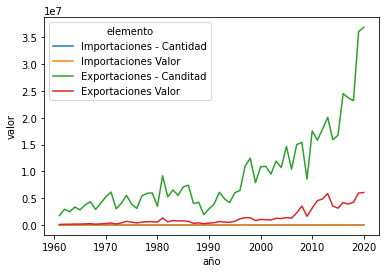

In [ ]:
#ARGENTINA-MAIZ
sns.lineplot(x='año', y='valor', hue='elemento', data=armaiz)

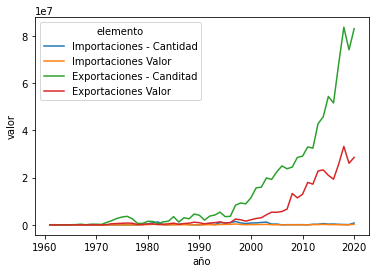

In [ ]:
#BRASIL-SOJA
sns.lineplot(x='año', y='valor', hue='elemento', data=brsoja)

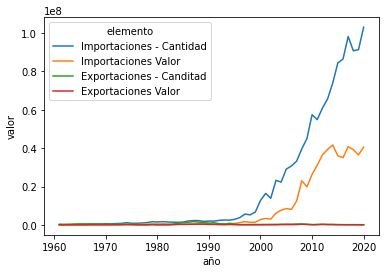

In [ ]:
#CHINA-SOJA
sns.lineplot(x='año', y='valor', hue='elemento', data=chsoja)

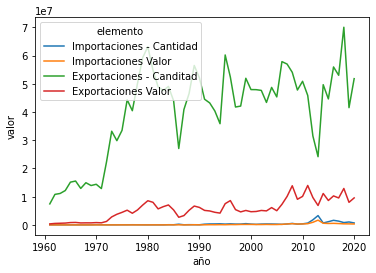

In [ ]:
#EEUU-MAIZ
sns.lineplot(x='año', y='valor', hue='elemento', data=eeuumaiz)

In [ ]:
argentina = fao[fao['area']=='Argentina'] #Filtramos por pais
argentina = argentina[['area','elemento','producto','año','unidad','valor']]
exp_arg = argentina[argentina["elemento"].str.contains('Exportaciones - Canditad', na=False)] #filtramos los que tengan EXPOR en la columna elemento
exp_arg = exp_arg.drop('elemento', axis=1) # borramos la columna elementos
exp_arg_gr = exp_arg.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
exp_arg_gr = exp_arg_gr.reset_index(drop=False) #reseteamos el indice
exp_arg_gr.columns = exp_arg_gr.columns.str.replace('valor', 'valor_exp_arg_cantidad') #cambios el nombre a la columna valor
exp_arg_gr.head()

,año,producto,valor_exp_arg_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",0
2,1961,Maiz,1730146
3,1961,Soja,0
4,1961,Trigo,1065537


In [ ]:
argentina = fao[fao['area']=='Argentina'] #Filtramos por pais
argentina = argentina[['area','elemento','producto','año','unidad','valor']]
exp_arg = argentina[argentina["elemento"]=='Exportaciones - Canditad'] #filtramos los que tengan EXPOR en la columna elemento
exp_arg = exp_arg.drop('elemento', axis=1) # borramos la columna elementos
exp_arg_gr = exp_arg.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
exp_arg_gr = exp_arg_gr.reset_index(drop=False) #reseteamos el indice
exp_arg_gr.columns = exp_arg_gr.columns.str.replace('valor', 'valor_exp_arg_cantidad') #cambios el nombre a la columna valor
exp_arg_gr.head()

,año,producto,valor_exp_arg_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",0
2,1961,Maiz,1730146
3,1961,Soja,0
4,1961,Trigo,1065537


In [ ]:
argentina1 = fao[fao['area']=='Argentina'] #Filtramos por pais
argentina1 = argentina[['area','elemento','producto','año','unidad','valor']]
exp_imp_arg = argentina[argentina["elemento"].str.contains('Exportaciones - Canditad', na=False)] #filtramos los que tengan EXPOR en la columna elemento
exp_imp_arg = exp_imp_arg.drop('elemento', axis=1) # borramos la columna elementos
exp_arg_gr = exp_arg.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
exp_arg_gr = exp_arg_gr.reset_index(drop=False) #reseteamos el indice
exp_arg_gr.columns = exp_arg_gr.columns.str.replace('valor', 'valor_exp_arg_cantidad') #cambios el nombre a la columna valor
exp_arg_gr.head()

,año,producto,valor_exp_arg_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",0
2,1961,Maiz,1730146
3,1961,Soja,0
4,1961,Trigo,1065537


In [ ]:
brasil = fao[fao['area']=='Brasil'] #Filtramos por pais
brasil = brasil[['area','elemento','producto','año','unidad','valor']]
exp_br = brasil[brasil["elemento"].str.contains('Exportaciones - Canditad', na=False)] #filtramos los que tengan EXPOR en la columna elemento
exp_br = exp_br.drop('elemento', axis=1) # borramos la columna elementos
exp_br_gr = exp_br.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
exp_br_gr = exp_br_gr.reset_index(drop=False) #reseteamos el indice
exp_br_gr.columns = exp_br_gr.columns.str.replace('valor', 'valor_exp_br_cantidad') #cambios el nombre a la columna valor
exp_br_gr.head()

,año,producto,valor_exp_br_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",0
2,1961,Maiz,4448
3,1961,Soja,73270
4,1961,Trigo,0


In [ ]:
eeuu = fao[fao['area']=='Estados Unidos de América'] #Filtramos por pais
eeuu = eeuu[['area','elemento','producto','año','unidad','valor']]
exp_eeuu = eeuu[eeuu["elemento"].str.contains('Exportaciones - Canditad', na=False)] #filtramos los que tengan EXPOR en la columna elemento
exp_eeuu = exp_eeuu.drop('elemento', axis=1) # borramos la columna elementos
exp_eeuu_gr = exp_eeuu.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
exp_eeuu_gr = exp_eeuu_gr.reset_index(drop=False) #reseteamos el indice
exp_eeuu_gr.columns = exp_eeuu_gr.columns.str.replace('valor', 'valor_exp_eeuu_cantidad') #cambios el nombre a la columna valor
exp_eeuu_gr.head()

,año,producto,valor_exp_eeuu_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",273261
2,1961,Maiz,7452500
3,1961,Soja,3634190
4,1961,Trigo,17168496


In [ ]:
china = fao[fao['area']=='China'] #Filtramos por pais
china = china[['area','elemento','producto','año','unidad','valor']]
imp_ch = china[china["elemento"].str.contains('Importaciones - Cantidad', na=False)] #filtramos los que tengan IMPOR en la columna elemento
imp_ch = imp_ch.drop('elemento', axis=1) # borramos la columna elementos
imp_ch_gr = imp_ch.groupby(["año","producto"]).sum(["valor"]) #hacemos el group by y sumamos valores
imp_ch_gr = imp_ch_gr.reset_index(drop=False) #reseteamos el indice
imp_ch_gr.columns = imp_ch_gr.columns.str.replace('valor', 'valor_imp_ch_cantidad') #cambiamos nombre columna valor
imp_ch_gr.head()

,año,producto,valor_imp_ch_cantidad
0,1961,"Aceite, palma",0
1,1961,"Aceite, soja",24478
2,1961,Maiz,666100
3,1961,Soja,174260
4,1961,Trigo,4235149


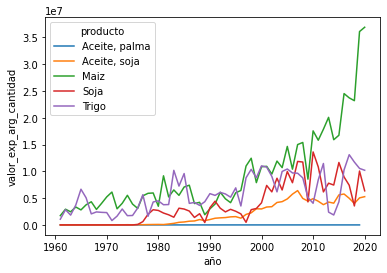

In [ ]:
#ARGENTINA
#Cantidad exportada por año, producto y pais.
sns.lineplot(x='año', y='valor_exp_arg_cantidad', hue='producto', data=exp_arg_gr)

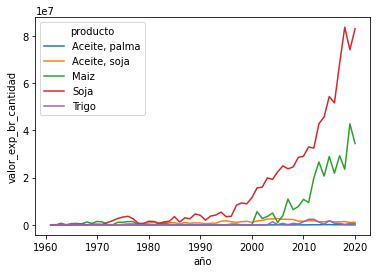

In [ ]:
#BRASIL
#Cantidad exportada por año, producto y pais.
sns.lineplot(x='año', y='valor_exp_br_cantidad', hue='producto', data=exp_br_gr)

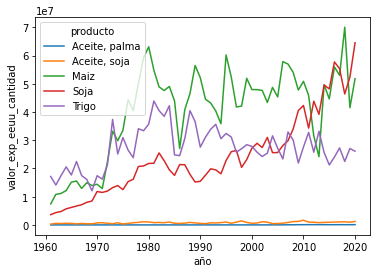

In [ ]:
#EEUU
#Cantidad exportada por año, producto y pais.
sns.lineplot(x='año', y='valor_exp_eeuu_cantidad', hue='producto', data=exp_eeuu_gr)

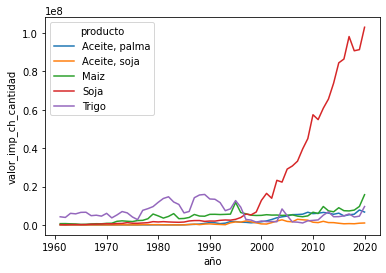

In [ ]:
#EN CHINA ES NECESARIO HACER PRINCIPALMENTE GRAFICO DE IMPORTACIONES.
#CHINA
#Cantidad exportada por año, producto y pais.
sns.lineplot(x='año', y='valor_imp_ch_cantidad', hue='producto', data=imp_ch_gr)

Relación de las importaciones Chinas con respecto a las exportaciones Argentinas

In [ ]:
#IMPORTACIONES CHINAS CON ARGENTINA
chi_arg = pd.merge(imp_ch_gr, exp_arg_gr, on=['año', 'producto'])
chi_arg.head()

,año,producto,valor_imp_ch_cantidad,valor_exp_arg_cantidad
0,1961,"Aceite, palma",0,0
1,1961,"Aceite, soja",24478,0
2,1961,Maiz,666100,1730146
3,1961,Soja,174260,0
4,1961,Trigo,4235149,1065537


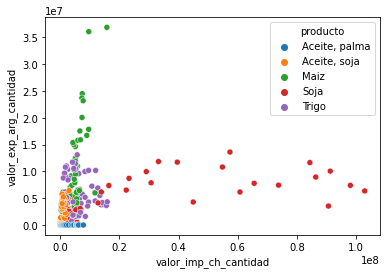

In [ ]:
sns.scatterplot(data=chi_arg, x="valor_imp_ch_cantidad", y="valor_exp_arg_cantidad", hue="producto")

Relación de las importaciones Chinas con respecto a las exportaciones de EEUU

In [ ]:
#IMPORTACIONES CHINAS CON EEUU
chi_eeuu = pd.merge(imp_ch_gr, exp_eeuu_gr, on=['año', 'producto'])
chi_eeuu.head()

,año,producto,valor_imp_ch_cantidad,valor_exp_eeuu_cantidad
0,1961,"Aceite, palma",0,0
1,1961,"Aceite, soja",24478,273261
2,1961,Maiz,666100,7452500
3,1961,Soja,174260,3634190
4,1961,Trigo,4235149,17168496


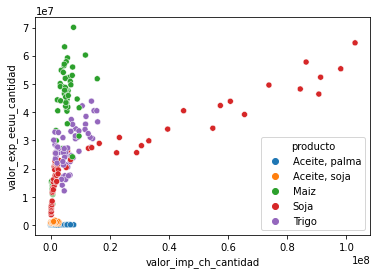

In [ ]:
sns.scatterplot(data=chi_eeuu, x="valor_imp_ch_cantidad", y="valor_exp_eeuu_cantidad", hue="producto")

Relación de las importaciones Chinas con respecto a las exportaciones de Brasil

In [ ]:
#IMPORTACIONES CHINAS CON BRASIL
chi_br = pd.merge(imp_ch_gr, exp_br_gr, on=['año', 'producto'])
chi_br.head()

,año,producto,valor_imp_ch_cantidad,valor_exp_br_cantidad
0,1961,"Aceite, palma",0,0
1,1961,"Aceite, soja",24478,0
2,1961,Maiz,666100,4448
3,1961,Soja,174260,73270
4,1961,Trigo,4235149,0


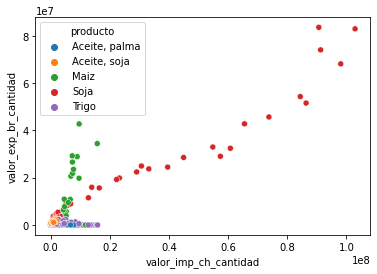

In [ ]:
sns.scatterplot(data=chi_br, x="valor_imp_ch_cantidad", y="valor_exp_br_cantidad", hue="producto")

Es posible visualizar como la demanda de china por la soja genera una alta relación con las exportaciones de los principales productores de la Soja, evitando por completo una demanda diversificada y influyendo estos de manera relevante en los precios y stocks mundiales.

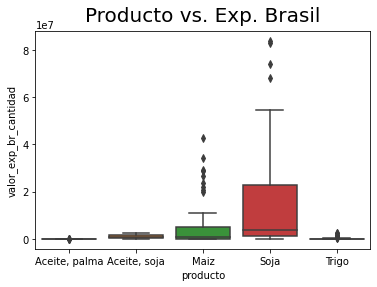

In [ ]:
sns.boxplot(x='producto', y = 'valor_exp_br_cantidad', data = chi_br) 
plt.title("Producto vs. Exp. Brasil", fontsize=20, verticalalignment='bottom');

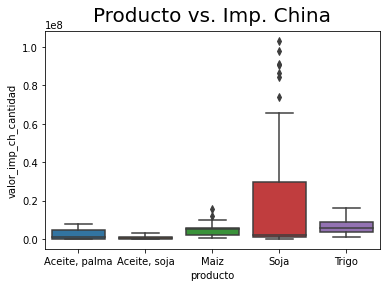

In [ ]:
sns.boxplot(x='producto', y = 'valor_imp_ch_cantidad', data = chi_br) 
plt.title("Producto vs. Imp. China", fontsize=20, verticalalignment='bottom');

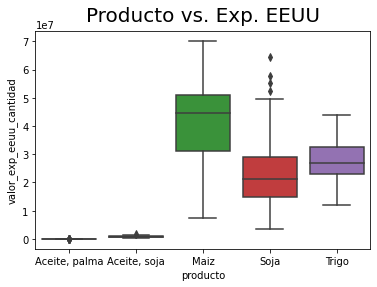

In [ ]:
sns.boxplot(x='producto', y = 'valor_exp_eeuu_cantidad', data = chi_eeuu) 
plt.title("Producto vs. Exp. EEUU", fontsize=20, verticalalignment='bottom');

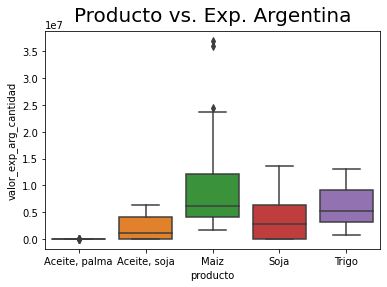

In [ ]:
sns.boxplot(x='producto', y = 'valor_exp_arg_cantidad', data = chi_arg) 
plt.title("Producto vs. Exp. Argentina", fontsize=20, verticalalignment='bottom');

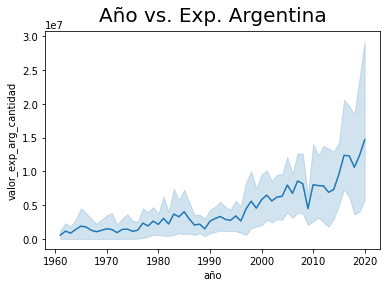

In [ ]:
sns.lineplot(x='año', y = 'valor_exp_arg_cantidad', data = chi_arg) 
plt.title("Año vs. Exp. Argentina", fontsize=20, verticalalignment='bottom');

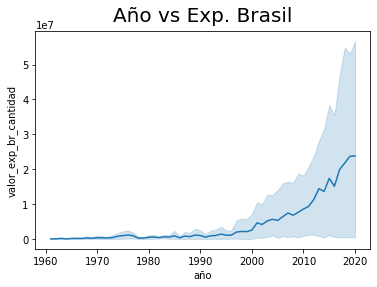

In [ ]:
sns.lineplot(x='año', y = 'valor_exp_br_cantidad', data = chi_br) 
plt.title("Año vs Exp. Brasil", fontsize=20, verticalalignment='bottom');

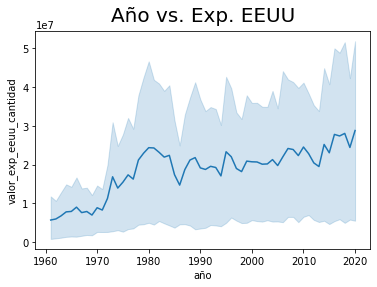

In [ ]:
sns.lineplot(x='año', y = 'valor_exp_eeuu_cantidad', data = chi_eeuu) 
plt.title("Año vs. Exp. EEUU", fontsize=20, verticalalignment='bottom');

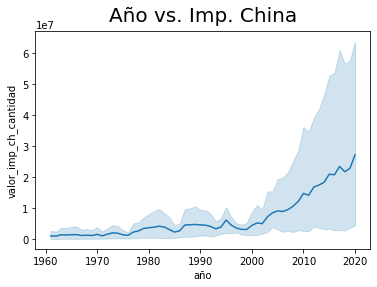

In [ ]:
sns.lineplot(x='año', y = 'valor_imp_ch_cantidad', data = chi_br) 
plt.title("Año vs. Imp. China", fontsize=20, verticalalignment='bottom');

A medida que pasan los años debdio al aumento de la globalización, el creciente aumento de las poblaciones y la tenologia las exportaciones e importaciones fueron en aumento.

# **DATOS : EDA ()**

---



---

En esta aréa se encuentran datos estadisticos.

El concepto es igual al de mediana, salvo que aquí la división ya no es en el 50%. El 25% de las observaciones es menor que el primer cuartil. Los cuartiles abarcan el 25%, 50% y 75% de las observaciones. Los percentiles son una generalización con cualquier porcentaje

-La media aritmética se define como la suma de N elementos dividida entre N. Se trata una medida bastante conocida entre la gente, aunque tiene el inconveniente de que es muy susceptible a valores extremos.

-La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.

-La moda es el valor más repetido (solo aplicable a variables discretas).

In [ ]:
#Estadisticas de improtaciones chinas
chi_br[['valor_imp_ch_cantidad']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_imp_ch_cantidad,300.0,6771174.56,1.548790e+07,0.0,538014.0,2199164.0,5726417.0,102944702.0


In [ ]:
#Estadisticas de exportaciones brasileras
chi_br[['valor_exp_br_cantidad']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_exp_br_cantidad,300.0,4.340386e+06,1.209553e+07,0.0,627.25,195837.0,1569244.75,83605198.0


In [ ]:
#Estadisticas de exportaciones Argentinas
chi_arg[['valor_exp_arg_cantidad']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_exp_arg_cantidad,294.0,4.291867e+06,5.346109e+06,0.0,11.75,2975147.5,6087606.0,36881996.0


In [ ]:
#Estadisticas de exportaciones EEUU
chi_eeuu[['valor_exp_eeuu_cantidad']].describe().T

,count,mean,std,min,25%,50%,75%,max
valor_exp_eeuu_cantidad,300.0,18533459.74,1.869184e+07,0.0,550476.75,15509841.5,31244975.0,70066295.0


kurtosis
El patrón de referencia es una distribución normal, que tiene una curtosis de 3. En muestra de esto, a menudo el exceso de Kurtosis se presenta: el exceso de curtosis es simplemente kurtosis-3 . Por ejemplo, la "Kurtosis" informada por Excel es en realidad el exceso de Kurtosis.

Una distribución normal tiene curtosis exactamente 3 (exceso de Kurtosis exactamente 0). Cualquier distribución con Kurtosis ≈3 (exceso de ≈0) se llama mesokurtic.

Una distribución con Kurtosis <3 (exceso de Kurtosis <0) se llama platykurtic. En comparación con una distribución normal, sus colas son más cortas y más delgadas, y a menudo su pico central es más bajo y más ancho.

Una distribución con Kurtosis> 3 (exceso de Kurtosis> 0) se llama leptokurtic. En comparación con una distribución normal, sus colas son más largas y gordas, y a menudo su pico central es más alto y más afilado.

Histogramas para entender la distribucion de las exportaciones de Argentina, Brasil, EEUU y las importaciones de China.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


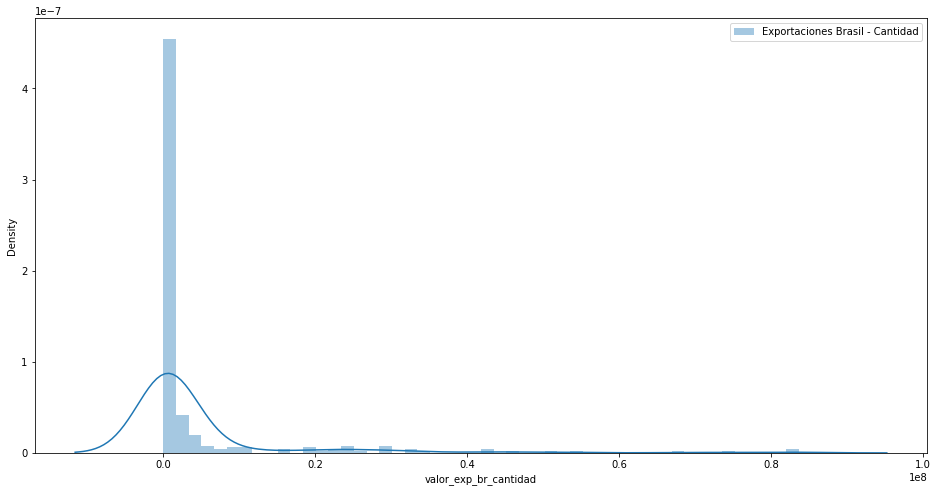

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(chi_br["valor_exp_br_cantidad"] , label="Exportaciones Brasil - Cantidad")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


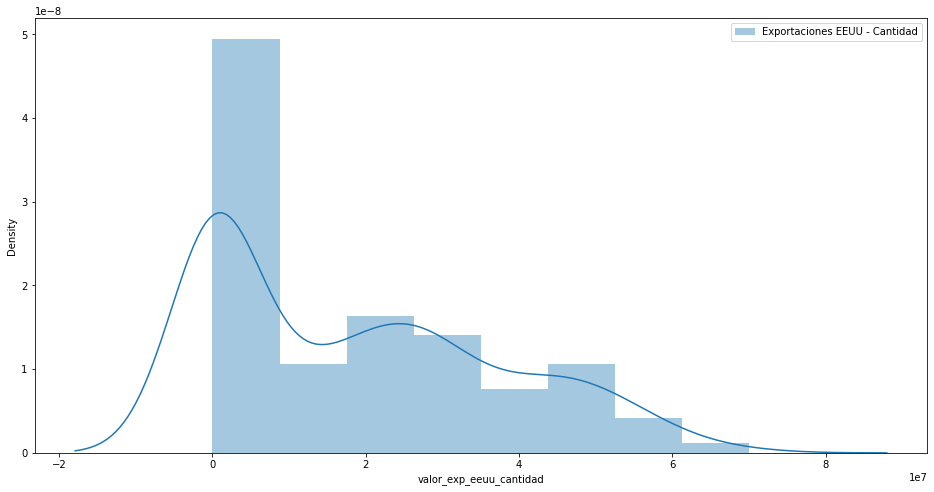

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(chi_eeuu["valor_exp_eeuu_cantidad"] , label="Exportaciones EEUU - Cantidad")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


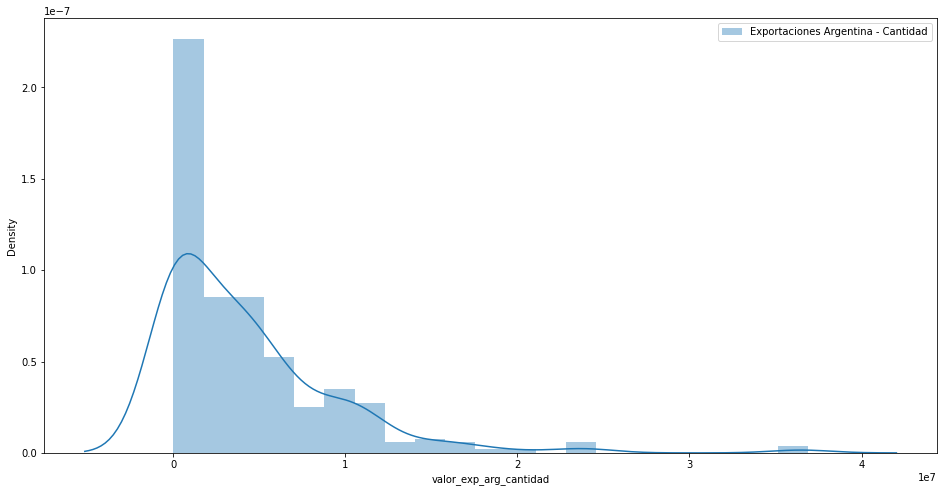

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(chi_arg["valor_exp_arg_cantidad"] , label="Exportaciones Argentina - Cantidad")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


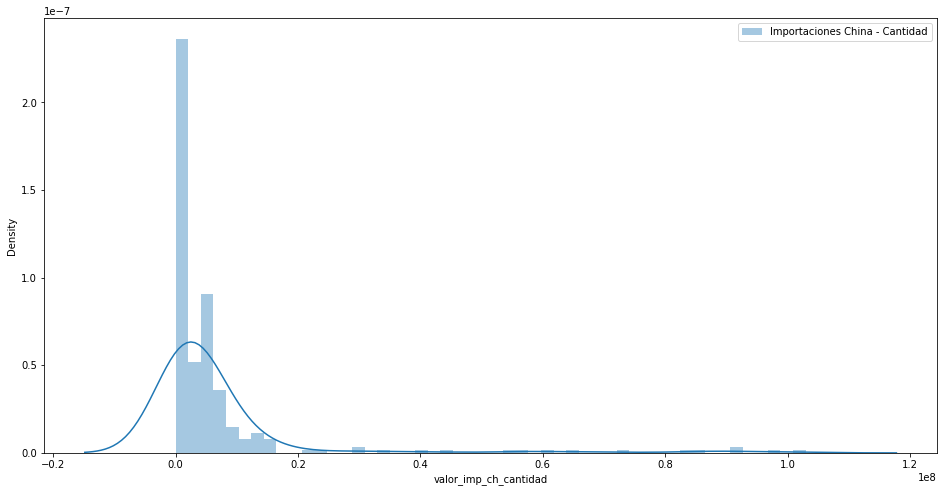

In [ ]:
# Grouped boxplot
plt.figure(figsize=(16,8))
sns.distplot(chi_br["valor_imp_ch_cantidad"] , label="Importaciones China - Cantidad")
plt.legend()
plt.show()

Diagrama de cajas para ver la distribucion de improtaciones y exportaciones

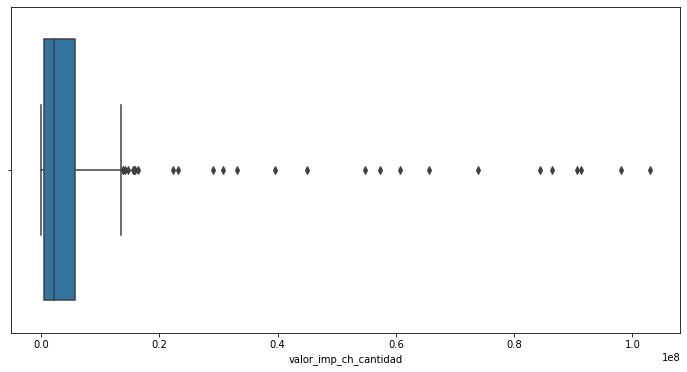

In [ ]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='valor_imp_ch_cantidad', data=chi_br);

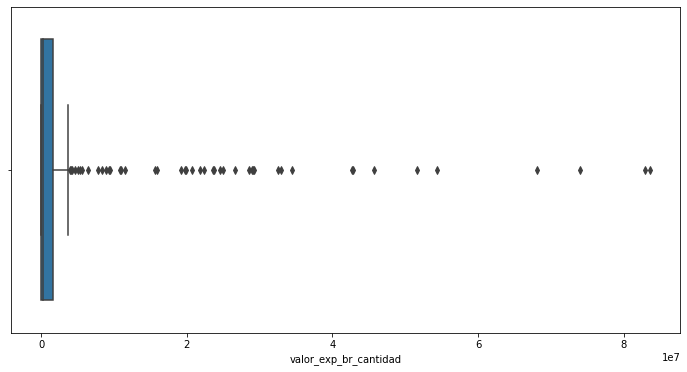

In [ ]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='valor_exp_br_cantidad', data=chi_br);

- Utilizar metodo de limpieza IQR. 
- Elimina q entre 0.25 y 0.45 (ver como va ) 
- 

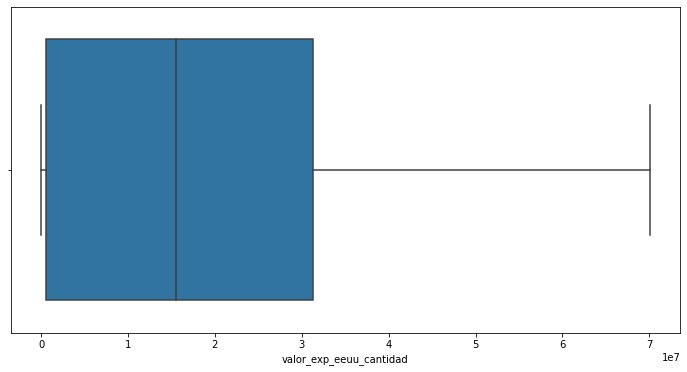

In [ ]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='valor_exp_eeuu_cantidad', data=chi_eeuu);

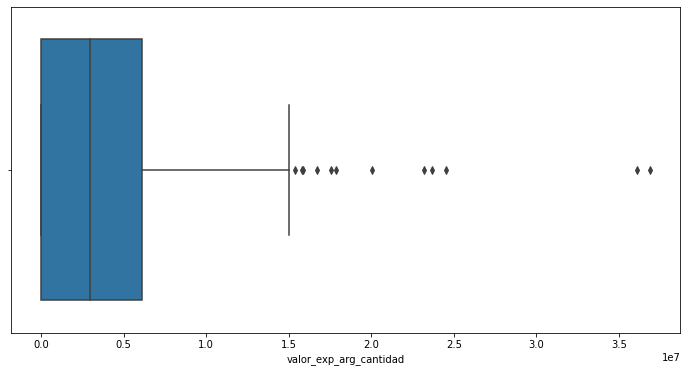

In [ ]:
# Grouped boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='valor_exp_arg_cantidad', data=chi_arg);

Es posible ver mucha dispersion y bastantes datos outliers en las exportaciones de Brasil, Argentina y en las importaciones de China. En las exportaciones de EEUU no es posible visualizar una gran cantidad de datos outliers.

El objetivo de este trabajo es predecir por un lado las importaciones de cada país, principalmente China. A su vez el objetivo viene acompañado de predecir de forma apartada las exportaciones de los países teniendo en cuenta la alta relación que existe de estos los commodities analizados con las importaciones de China de estos . 
Para lograr una predicción mas acertada va a adicionarse al dataset original información de los paises y productos analizados sobre la producción, cosecha y rendimiento en cada año.
Va a proceder a realizarse el mismo analisis en el dataset de producción.

# **FEATURE SELECTION**

---



La idea es poder armar un data set con las exportaciones de cada país y otro con las importaciones de cada país, anexando a ese data set la producción de cada año y cada comoditties .

Si bien tenemos muchas variables para realizar el modelo vamos a seleccionar las mas importantes para el modelo.
Estas son :
- Area
- Elemento (Importaciones - cantidad)
- Producto
- Año
- Valor


Voy a utilizar como Feature Selection un modelo de Machine Learning

In [ ]:
fao_cantidad = fao[fao["elemento"].str.contains('Can', na=False)]
fao_cantidad

,codigo,ambito,codigo_fao,area,codigo_elemento,elemento,codigo_producto_fao,producto,codigo_año,año,unidad,valor,simbolo,descrip_simbolo
0,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1961,1961,toneladas,177,NaN,Datos oficiales
1,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1962,1962,toneladas,15,NaN,Datos oficiales
2,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1963,1963,toneladas,199,NaN,Datos oficiales
3,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1964,1964,toneladas,757,NaN,Datos oficiales
4,TCL,Cultivos y productos de ganadería,9,Argentina,5610,Importaciones - Cantidad,257,"Aceite, palma",1965,1965,toneladas,186,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5910,Exportaciones - Canditad,15,Trigo,2016,2016,toneladas,24041586,NaN,Datos oficiales
4724,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5910,Exportaciones - Canditad,15,Trigo,2017,2017,toneladas,27299214,NaN,Datos oficiales
4725,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5910,Exportaciones - Canditad,15,Trigo,2018,2018,toneladas,22499006,NaN,Datos oficiales
4726,TCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5910,Exportaciones - Canditad,15,Trigo,2019,2019,toneladas,27068607,NaN,Datos oficiales


In [ ]:
# Coloco target para extrar columna como y luego usarla como y train.
#target = 'valor'

In [ ]:
#target

In [ ]:
# DE ESTA MANERA TENGO PCA LISTO Y FEATURE SELECTION
fao_cantidad_drop = fao_cantidad[['codigo_fao', 'codigo_elemento', 'codigo_producto_fao', 'año', 'valor']]
fao_cantidad_drop

,codigo_fao,codigo_elemento,codigo_producto_fao,año,valor
0,9,5610,257,1961,177
1,9,5610,257,1962,15
2,9,5610,257,1963,199
3,9,5610,257,1964,757
4,9,5610,257,1965,186
...,...,...,...,...,...
4723,231,5910,15,2016,24041586
4724,231,5910,15,2017,27299214
4725,231,5910,15,2018,22499006
4726,231,5910,15,2019,27068607


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
train_test_split(fao_cantidad_drop, test_size = 0.20, random_state = 12345)

[      codigo_fao  codigo_elemento  codigo_producto_fao   año     valor
 2393         351             5610                  257  1966       124
 3632         231             5610                  257  2005    415889
 36             9             5610                  257  1997        25
 4480         231             5910                  236  2013  39175583
 3400         351             5610                   15  2013   6830683
 ...          ...              ...                  ...   ...       ...
 4247         231             5910                   56  2020  51838933
 1080           9             5910                   15  1973   2970599
 736            9             5610                  236  1989        61
 4331         231             5610                  236  1984     10947
 956            9             5610                   15  1969    392034
 
 [1915 rows x 5 columns],
       codigo_fao  codigo_elemento  codigo_producto_fao   año     valor
 4554         231             5610  

In [ ]:
#df_train, df_test = train_test_split(fao_cantidad_drop, test_size = 0.20, random_state = 12345)

In [ ]:
#X_test = df_test.drop(target, axis = 1)
#y_test = df_test[target]

In [ ]:
#df_train.shape

In [ ]:
#X_train = df_train.drop(target, axis = 1)
#y_train = df_train[target]

In [ ]:
#df_test.shape

In [ ]:
#X_test.shape, y_test.shape

In [ ]:
#df_train.head()

In [ ]:
#df_test.head()

In [ ]:
#AL TARGET LO TENGO PUESTO ARRIBA
#X_train = df_train.drop(target, axis = 1)
#y_train = df_train[target]

In [ ]:
#X_train

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler().fit(fao_cantidad_drop)
#scaler

In [ ]:
#fao_cantidad_drop

In [ ]:
#Invocamos el modelo de regresion logistica con 'LogisticRegression'
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(random_state = 0)
#classifier.fit(X_train, y_train)

In [ ]:
# Realizamos la predicion en el conjunto de Test 
# y_pred son los valores teóricos
#y_train_pred= classifier.predict(X_train)
#y_test_pred = classifier.predict(X_test)

In [ ]:
#Validamos outliers mediante diagramas de cajas 
# Observamos que los outliers mas criticos estan en la variables AMT_INCOME_TOTAL 
#import seaborn as sns
#for x in fao_cantidad_drop:
  #plt.title(fao_cantidad_drop[x].name)
  #sns.boxplot(x=fao_cantidad_drop[x], palette="Blues");
  #plt.show()
#sns.boxplot(x='codigo_producto_fao', data = fao_cantidad_drop)

In [ ]:
f#rom sklearn.metrics import confusion_matrix

NameError: ignored

In [ ]:
#y_predict = modelo.predict(X_test)

In [ ]:
#from sklearn.metrics import confusion_matrix

In [ ]:
#modelo_drop = confusion_matrix(y_test, y_predict)
#modelo_drop

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
#plot_confusion_matrix([classifier], X_test, y_test)
#plt.show()

In [ ]:
from sklearn.metrics import classification_report
#Validamos Metricas en la Data de Train
#Siempre saldran muy buenas metricas con la data de train  
#print(classification_report(y_train, y_train_pred))
#Validamos Metricas en la Data de Test 
#print(classification_report(y_test, y_test_pred))
#Se valida que con 08 componentes del dataset original tenemos un buen modelo de clasificacion multiclase.

# **Feature Selection 2 / Data wrangling**

---



In [ ]:
chi_br_soja = chi_br[chi_br["producto"].str.contains('Soja', na=False)]
chi_br_soja

In [ ]:
chi_br_soja_2000 = chi_br_soja[chi_br_soja['año']>=2000]
chi_br_soja_2000

,año,producto,valor_imp_ch_cantidad,valor_exp_br_cantidad
198,2000,Soja,12761326,11517260
203,2001,Soja,16420930,15675543
208,2002,Soja,13882237,15970003
213,2003,Soja,23228660,19890467
218,2004,Soja,22290166,19247690
223,2005,Soja,29070624,22435072
228,2006,Soja,30690082,24957975
233,2007,Soja,33185354,23733776
238,2008,Soja,39563078,24499491
243,2009,Soja,44951255,28562707


In [ ]:
chi_br_soja_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 198 to 298
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   año                    21 non-null     int64 
 1   producto               21 non-null     object
 2   valor_imp_ch_cantidad  21 non-null     int64 
 3   valor_exp_br_cantidad  21 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 840.0+ bytes


In [ ]:
chi_br_soja_drop = chi_br_soja[['año','valor_imp_ch_cantidad', 'valor_exp_br_cantidad']]
chi_br_soja_drop

,año,valor_imp_ch_cantidad,valor_exp_br_cantidad
3,1961,174260,73270
8,1962,83310,96770
13,1963,201160,33450
18,1964,194320,0
23,1965,164670,75290
28,1966,184834,121241
33,1967,373149,304543
38,1968,403644,65859
43,1969,490323,310148
48,1970,637312,289623


In [ ]:
train_test_split(chi_br_soja_drop, test_size = 0.20, random_state = 12345)

[      año  valor_imp_ch_cantidad  valor_exp_br_cantidad
 128  1986                2058565                1200151
 63   1973                 772458                1786138
 103  1981                1702327                1449729
 198  2000               12761326               11517260
 43   1969                 490323                 310148
 13   1963                 201160                  33450
 133  1987                2266198                3023651
 123  1985                1495348                3491476
 203  2001               16420930               15675543
 98   1980                1537176                1548883
 243  2009               44951255               28562707
 218  2004               22290166               19247690
 263  2013               65554825               42796106
 143  1989                1846152                4618003
 28   1966                 184834                 121241
 18   1964                 194320                      0
 78   1976                 8563

In [ ]:
df_train, df_test = train_test_split(chi_br_soja_drop, test_size = 0.20, random_state = 12345)

In [ ]:
target = 'valor_exp_br_cantidad'
target

'valor_exp_br_cantidad'

In [ ]:
X_test = df_test.drop(target, axis = 1)
y_test = df_test[target]

In [ ]:
X_train = df_train.drop(target, axis = 1)
y_train = df_train[target]

In [ ]:
df_train.shape

(48, 3)

In [ ]:
df_test.shape

(12, 3)

In [ ]:
X_test.shape, y_test.shape

((12, 2), (12,))

In [ ]:
df_train.head()

,año,valor_imp_ch_cantidad,valor_exp_br_cantidad
128,1986,2058565,1200151
63,1973,772458,1786138
103,1981,1702327,1449729
198,2000,12761326,11517260
43,1969,490323,310148


In [ ]:
df_test.head()

,año,valor_imp_ch_cantidad,valor_exp_br_cantidad
253,2011,54834369,32985562
213,2003,23228660,19890467
153,1991,1992646,2020437
228,2006,30690082,24957975
113,1983,1440128,1295095


In [ ]:
scaler = StandardScaler().fit(chi_br_soja_drop)
scaler

StandardScaler()

In [ ]:
#Invocamos el modelo de regresion logistica con 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [ ]:
# Realizamos la predicion en el conjunto de Test 
# y_pred son los valores teóricos
y_train_pred= classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

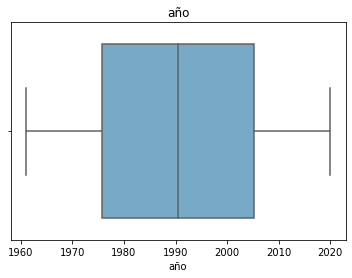

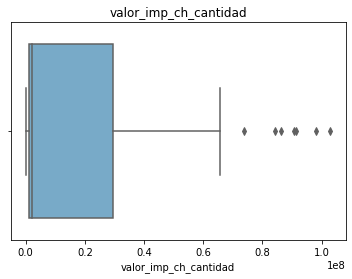

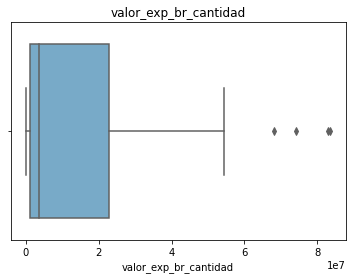

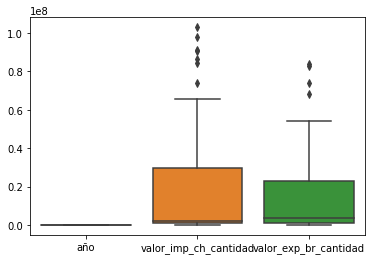

In [ ]:
#Validamos outliers mediante diagramas de cajas 
# Observamos que los outliers mas criticos estan en la variables AMT_INCOME_TOTAL 
import seaborn as sns
for x in chi_br_soja_drop:
  plt.title(chi_br_soja_drop[x].name)
  sns.boxplot(x=chi_br_soja_drop[x], palette="Blues");
  plt.show()
sns.boxplot(data = chi_br_soja_drop)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
modelo_drop = confusion_matrix(y_test, y_test_pred)
modelo_drop

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import classification_report
#Validamos Metricas en la Data de Train
#Siempre saldran muy buenas metricas con la data de train  
print(classification_report(y_train, y_train_pred))
#Validamos Metricas en la Data de Test 
print(classification_report(y_test, y_test_pred))
#Se valida que con 08 componentes del dataset original tenemos un buen modelo de clasificacion multiclase.

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
       33450       0.00      0.00      0.00         1
       65859       0.00      0.00      0.00         1
       73270       0.00      0.00      0.00         1
       75290       0.00      0.00      0.00         1
       96770       0.00      0.00      0.00         1
      121241       0.00      0.00      0.00         1
      213426       0.00      0.00      0.00         1
      289623       0.00      0.00      0.00         1
      310148       0.00      0.00      0.00         1
      638466       0.00      0.00      0.00         1
      658527       0.00      0.00      0.00         1
     1037273       0.00      0.00      0.00         1
     1200151       0.00      0.00      0.00         1
     1449729       0.00      0.00      0.00         1
     1548883       0.00      0.00      0.00         1
     1561110       0.00      0.00      0.00         1
     1786138       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

# **METRICAS MODELO REGRESION**

---



In [ ]:
from sklearn.model_selection import train_test_split
#X_train,X_test,y_train,y_test = train_test_split(diabetes_X,diabetes_y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression #probar knn o regression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_test_pred))

MAE 67772322.66666667


MAE - Error absoluto medio
Esta metrica hace uso de los residuos del modelo y predicho, pero toma el promedio de todos los residuos.
Por lo cual podemos observar un gran numero de residuos en el modelo.

(controlar si esta bien)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_test_pred))

MSE 4806582050306125.0


Aqui podemos ver el valor promedio de los residuos pero al cuadrado por lo cual le damos mucho mas pesos a los errores grandes que a los pequeños. De esta manera podemos observar como aumentan los residuos.

In [ ]:
print("MSE",mean_squared_error(y_test,y_test_pred))

MSE 4806582050306125.0


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMSE 69329517.88600671


Estra metrica incorpora la raiz cuadrada, lo que quiere decir que los errores nos los da al cuadrado. RMSE es comparable con MSE, aunque conviene utilizar MSE de manera mas frecuente.

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
print(r2)

-21.513862710974898


Esta metrica se utiliza para saber de que manera nuestro modelo se agusta a los datos, pero esta metrica no aplica a modelos de regresión no lineales.
Esta metrica es equivalente a a la correlacion por lo cual es equivalente a decir que mide la relación entre dos variables .
Cuando llegamos al valor 1 podemos decir que nuestros valores son predichos de manera correcta en nuesto modelo.
En este caso podemos observar como aun el modelo no es eficiente.

# **TRANSFORMACIÓN DE DATASET DEFINITORIO PARA TRABAJAR CON IA .**

---



---




FALTA TRABAJAR, NO VA EN ENTREGA

In [ ]:
arg_soja = exp_arg_gr[exp_arg_gr['producto']=='Soja'] #Filtramos por producto
arg_soja

,año,producto,valor_exp_arg_cantidad
3,1961,Soja,0
8,1962,Soja,0
13,1963,Soja,0
18,1964,Soja,10
23,1965,Soja,0
28,1966,Soja,492
33,1967,Soja,0
38,1968,Soja,7
43,1969,Soja,0
48,1970,Soja,0


In [ ]:
br_soja = exp_br_gr[exp_br_gr['producto']=='Soja']
br_soja

,año,producto,valor_exp_br_cantidad
3,1961,Soja,73270
8,1962,Soja,96770
13,1963,Soja,33450
18,1964,Soja,0
23,1965,Soja,75290
28,1966,Soja,121241
33,1967,Soja,304543
38,1968,Soja,65859
43,1969,Soja,310148
48,1970,Soja,289623


In [ ]:
ch_soja = imp_ch_gr[imp_ch_gr['producto']=='Soja']
ch_soja

,año,producto,valor_imp_ch_cantidad
3,1961,Soja,174260
8,1962,Soja,83310
13,1963,Soja,201160
18,1964,Soja,194320
23,1965,Soja,164670
28,1966,Soja,184834
33,1967,Soja,373149
38,1968,Soja,403644
43,1969,Soja,490323
48,1970,Soja,637312


In [ ]:
eeuu_soja = exp_eeuu_gr[exp_eeuu_gr['producto']=='Soja']
eeuu_soja

,año,producto,valor_exp_eeuu_cantidad
3,1961,Soja,3634190
8,1962,Soja,4366870
13,1963,Soja,4754640
18,1964,Soja,5701945
23,1965,Soja,6196001
28,1966,Soja,6687608
33,1967,Soja,7169188
38,1968,Soja,8012028
43,1969,Soja,8473011
48,1970,Soja,11839087


In [ ]:
df_all = (ch_soja.merge(arg_soja, how='outer')
                  .merge(br_soja, how='outer')
                  .merge(eeuu_soja, how='outer'))
df_all

,año,producto,valor_imp_ch_cantidad,valor_exp_arg_cantidad,valor_exp_br_cantidad,valor_exp_eeuu_cantidad
0,1961,Soja,174260,0,73270,3634190
1,1962,Soja,83310,0,96770,4366870
2,1963,Soja,201160,0,33450,4754640
3,1964,Soja,194320,10,0,5701945
4,1965,Soja,164670,0,75290,6196001
5,1966,Soja,184834,492,121241,6687608
6,1967,Soja,373149,0,304543,7169188
7,1968,Soja,403644,7,65859,8012028
8,1969,Soja,490323,0,310148,8473011
9,1970,Soja,637312,0,289623,11839087


In [ ]:
exp_br = brasil[brasil["elemento"].str.contains('Exportaciones - Canditad', na=False)]

# **DATASET PRODUCCIÓN, RENDIMIENTO, COSECHA**

---



---



DATA SET PARA ANEXAR EN LAS PREDICCIONES.

In [ ]:
produc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coderhouse/Trabajo final/produccion.csv')
produc

,Código Ámbito,Ámbito,Código área (FAO),Área,Código Elemento,Elemento,Código Producto (FAO),Producto,Código año,Año,Unidad,Valor,Símbolo,Descripción del Símbolo
0,QCL,Cultivos y productos de ganadería,9,Argentina,5510,Producción,237,"Aceite, soja",1961,1961,toneladas,6,NaN,Datos oficiales
1,QCL,Cultivos y productos de ganadería,9,Argentina,5510,Producción,237,"Aceite, soja",1962,1962,toneladas,159,NaN,Datos oficiales
2,QCL,Cultivos y productos de ganadería,9,Argentina,5510,Producción,237,"Aceite, soja",1963,1963,toneladas,1253,NaN,Datos oficiales
3,QCL,Cultivos y productos de ganadería,9,Argentina,5510,Producción,237,"Aceite, soja",1964,1964,toneladas,859,NaN,Datos oficiales
4,QCL,Cultivos y productos de ganadería,9,Argentina,5510,Producción,237,"Aceite, soja",1965,1965,toneladas,808,NaN,Datos oficiales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2419,QCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5510,Producción,15,Trigo,2016,2016,toneladas,62831507,NaN,Datos oficiales
2420,QCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5510,Producción,15,Trigo,2017,2017,toneladas,47379810,NaN,Datos oficiales
2421,QCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5510,Producción,15,Trigo,2018,2018,toneladas,51305540,NaN,Datos oficiales
2422,QCL,Cultivos y productos de ganadería,231,Estados Unidos de América,5510,Producción,15,Trigo,2019,2019,toneladas,52580890,NaN,Datos oficiales


In [ ]:
produc['Elemento'].value_counts()

Producción        1074
Área cosechada     720
Rendimiento        630
Name: Elemento, dtype: int64

# **RESUMEN**


---



El siguiente dataset contiene información sobre commodities que son considerado de los más importantes para el mundo, esta información se encuentra seccionada por los países que mayor volumen comercializan de cada producto.

Los commodities analizados son: 

-	Soja
-	Maíz
-	Trigo
-	Aceite de palma
-	Aceite de soja 

Los países son:

-	Argentina
-	Brasil
-	China
-	Estados Unidos

Los elementos del dataset son:

-	Importaciones - Cantidad
-	Importaciones - Valor
-	Exportaciones - Cantidad
-	Exportaciones - Valor

Los elementos a analizar por país son las importaciones y exportaciones, ya sea en valor y cantidad. Los datos que confeccionan este dataset son extraídos de la FAO (Org. De las Naciones Unidas para la Alimentación y la Agricultura).
El objetivo detrás de este dataset es poder encontrar la relación que existe entre los países por cada producto, en cuanto al año que se exporto o importo más, información que es de relevancia debido a su influencia en los precios de los commodities y en decisiones geopolíticas de cada país.

Adicionalmente a encontrar y determinar relaciones entre los países se propone confeccionar un algoritmo de machine learning que logre predecir el comportamiento de los países en futuros años. Sera posible añadir a este algoritmo inputs como precios, producción, clima de cada país en búsqueda de poder conseguir una predicción de mayor precisión.


## ***INFORMACIÓN EXTRA.***

---



Codigo de área:
- Argentina: 9
- EEUU: 231   (Estados Unidos de América)
- Brasil: 21
- China: 351

Elemento Código:
- Importaciones - Cantidad: 5610
- Importaciones - Valor: 5622
- Exportaciones - Cantidad: 5910
- Exportaciones - Valor: 5922

Código producto:
- Aceite, soja:237 
- Maiz:56   
- Soja:236             
- Trigo:15              
- Aceite, palma:257  

Unidades:

- toneladas
- 1000 US$





Link:
https://www.fao.org/faostat/es/#data/TCL/visualize

# RECICLAR **CODIGOS**

---



---




In [ ]:
#NO USAR QUEDA DE EJEMPLO PARA PROXIMOS EJERCICIOS
soj_filtro = soj_ar_exp['año'] > 1900
soja_arg = soj_ar_exp[soj_filtro]
soja_arg['toneladas']=soja_arg['valor_exp_arg_cantidad']/1000000
soja_arg.head()

NameError: ignored

In [ ]:
#NO USAR QUEDA DE EJEMPLO PARA PROXIMOS EJERCICIOS
soj_ar_exp = exp_arg_gr[exp_arg_gr['producto'] == 'Soja'] #Filtramos por pais y producto
soj_ar_exp.head()

In [ ]:
#Ajustabndo un KNeighborsRegressor y resumir las puntuaciones 
#de importancia de los features de permutación.
# define the model
model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance,color='green')
pyplot.show()
#Los resultados sugieren que quizás dos o tres de las 10 características son importantes para la predicción.